In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F

In [ ]:
df = pd.read_csv('sample_data/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Preprocessing Data
X = df.iloc[:,:-2]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,52,1,0,125,212,0,1,168,0,1.0,2,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0


In [ ]:
Y = df.iloc[:,-2]
Y

,thal
0,3
1,3
2,3
3,3
4,2
...,...
1020,2
1021,3
1022,2
1023,2


In [ ]:
#normalizing x and y values
min_values = X.min()
max_values = X.max()

# Normalize each value between -1 and 1
df_normalized = 2 * (X - min_values) / (max_values - min_values) - 1

print("Normalized DataFrame:")
print(df_normalized)

Normalized DataFrame:
           age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    -0.041667  1.0 -1.000000 -0.415094 -0.607306 -1.0      0.0  0.480916   
1     0.000000  1.0 -1.000000 -0.132075 -0.648402  1.0     -1.0  0.282443   
2     0.708333  1.0 -1.000000 -0.037736 -0.780822 -1.0      0.0 -0.175573   
3     0.333333  1.0 -1.000000  0.018868 -0.648402 -1.0      0.0  0.374046   
4     0.375000 -1.0 -1.000000 -0.169811 -0.232877  1.0      0.0 -0.465649   
...        ...  ...       ...       ...       ...  ...      ...       ...   
1020  0.250000  1.0 -0.333333 -0.132075 -0.566210 -1.0      0.0  0.419847   
1021  0.291667  1.0 -1.000000 -0.415094 -0.397260 -1.0     -1.0  0.068702   
1022 -0.250000  1.0 -1.000000 -0.698113 -0.319635 -1.0     -1.0 -0.282443   
1023 -0.125000 -1.0 -1.000000 -0.698113 -0.415525 -1.0     -1.0  0.343511   
1024  0.041667  1.0 -1.000000 -0.509434 -0.716895 -1.0      0.0 -0.358779   

      exang   oldpeak  slope   ca  
0      -1.0 -0.67

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
Y = Y.to_numpy(dtype=np.float32)
Y

array([3., 3., 3., ..., 2., 2., 3.], dtype=float32)

In [ ]:
array_reshaped = Y.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)
Y_encoded = encoder.fit_transform(array_reshaped)
Y_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
X_normalized = X.to_numpy()

In [ ]:
class NeuralNetwork:

  def loss_matrix(self, prediction, target):
    target = torch.from_numpy(target)
    loss_m = - target * torch.log(prediction)
    return loss_m

  def loss(self, prediction, target):
    loss_m = self.loss_matrix(prediction, target)
    return torch.mean(torch.sum(loss_m, dim=1, keepdim=False))

  def classification_rate(self, prediction, target):
    sum = 0
    target = torch.from_numpy(target)
    for i,j in zip(prediction, target):
      if torch.argmax(i) == torch.argmax(j):
        sum += 1
    return sum / target.shape[0]

  def __init__(self, w1, b1, w2, b2, w3, b3):
    self.w1 = torch.from_numpy(w1)
    self.w1.requires_grad_()
    self.b1 = torch.from_numpy(b1)
    self.b1.requires_grad_()
    self.w2 = torch.from_numpy(w2)
    self.w2.requires_grad_()
    self.b2 = torch.from_numpy(b2)
    self.b2.requires_grad_()
    self.w3 = torch.from_numpy(w3)
    self.w3.requires_grad_()
    self.b3 = torch.from_numpy(b3)
    self.b3.requires_grad_()

  def test(self,in_matrix,target):
    in_matrix = torch.from_numpy(in_matrix)
    l1_output = torch.tanh(torch.mm(in_matrix, self.w1) + self.b1)
    l2_output = torch.tanh(torch.mm(l1_output, self.w2) + self.b2)
    l3_output = torch.tanh(torch.mm(l2_output, self.w3) + self.b3)
    prediction = F.softmax(l3_output, dim=1)
    self.loss_m = self.loss_matrix(prediction, target)
    self.loss_scalar = self.loss(prediction, target)
    self.c_rate = self.classification_rate(prediction, target)
    return prediction

  def train(self, epochs, learning_rate, in_matrix, target):
    for i in range(epochs):
        prediction = self.test(in_matrix, target)

        if i % 100 == 0:
            print(f'Loss = {self.loss_scalar}')
            print(f'Classification Rate = {self.c_rate}')

        print(f'self.loss_scalar = {self.loss_scalar}')

        # Perform backward pass
        self.loss_scalar.backward()

        # Validate gradients
        print(f'Gradient for w1: {self.w1.grad}')
        print(f'Gradient for w2: {self.w2.grad}')
        print(f'Gradient for w3: {self.w3.grad}')

        # Check if gradients are zero
        if torch.all(self.w1.grad == 0) or torch.all(self.w2.grad == 0) or torch.all(self.w3.grad == 0):
            print("Warning: Zero gradients detected!")

        # Update weights manually
        with torch.no_grad():  # Temporarily disable gradient tracking
            self.w1 -= learning_rate * self.w1.grad
            self.w2 -= learning_rate * self.w2.grad
            self.w3 -= learning_rate * self.w3.grad
            self.b1 -= learning_rate * self.b1.grad
            self.b2 -= learning_rate * self.b2.grad
            self.b3 -= learning_rate * self.b3.grad

        # Zero out the gradients after updating
        self.w1.grad.zero_()
        self.w2.grad.zero_()
        self.w3.grad.zero_()
        self.b1.grad.zero_()
        self.b2.grad.zero_()
        self.b3.grad.zero_()

In [ ]:
# X_example = X_normalized[:16]
# w1 = np.ones((12, 800))*0.1
# b1 = np.zeros((800,))
# w2 = np.ones((800, 600))*0.1
# b2 = np.zeros((600,))
# w3 = np.ones((600, 4))*0.1
# b3 = np.zeros((4,))
# nn = NeuralNetwork(w1, b1, w2, b2, w3, b3)

# nn.train(1, 100, X_example, Y_encoded[:16])


In [ ]:
def gradient_descent(w1,w2,w3,b1,b2,b3,epochs,learning_rate,target,in_matrix):

  def forward():
    l1_output = torch.tanh(torch.mm(in_matrix, w1) + b1)
    l2_output = torch.tanh(torch.mm(l1_output, w2) + b2)
    l3_output = torch.tanh(torch.mm(l2_output, w3) + b3)
    return F.softmax(l3_output, dim=1)

  def loss():
    prediction = forward()
    loss_m = - target * torch.log(prediction)
    return torch.mean(torch.sum(loss_m, dim=1, keepdim=False))

  def classification_rate():
    sum = 0
    prediction = forward()
    for i,j in zip(prediction, target):
      if torch.argmax(i) == torch.argmax(j):
        sum += 1
    return sum / target.shape[0]

  for i in range(epochs):
    loss_scalar = loss()
    if i % 10 == 0:
      print(f'Epoch - {i}')
      print(f'loss = {loss_scalar}')
      print(f'classification_rate = {classification_rate()}')
    loss_scalar.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
        b3 -= learning_rate * b3.grad


        # Zero out the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
        b3.grad.zero_()


In [ ]:
# # import torch.nn as nn
# # Initialize weights using Xavier (Glorot) initialization
# w1 = torch.empty(12, 800, requires_grad=True)
# nn.init.xavier_uniform_(w1)

# w2 = torch.empty(800, 600, requires_grad=True)
# nn.init.xavier_uniform_(w2)

# w3 = torch.empty(600, 4, requires_grad=True)
# nn.init.xavier_uniform_(w3)

# # Initialize biases to zero (common practice)
# b1 = torch.zeros(800, requires_grad=True)
# b2 = torch.zeros(600, requires_grad=True)
# b3 = torch.zeros(4, requires_grad=True)

# Y_example = torch.from_numpy(Y_encoded[:16])
# Y_example = Y_example.to(torch.float32)

# X_example = torch.from_numpy(X_example)
# X_example = X_example.to(torch.float32)

# gradient_descent(w1,w2,w3,b1,b2,b3,100,0.1,Y_example, X_example)

In [ ]:
import torch
import torch.nn as nn
# Initialize weights using Xavier (Glorot) initialization
w1 = torch.empty(12, 800, requires_grad=True)
nn.init.xavier_uniform_(w1)

w2 = torch.empty(800, 600, requires_grad=True)
nn.init.xavier_uniform_(w2)

w3 = torch.empty(600, 4, requires_grad=True)
nn.init.xavier_uniform_(w3)

# Initialize biases to zero (common practice)
b1 = torch.zeros(800, requires_grad=True)
b2 = torch.zeros(600, requires_grad=True)
b3 = torch.zeros(4, requires_grad=True)

Y_example = torch.from_numpy(Y[:16])
Y_example = Y_example.to(torch.float32)

X_example = torch.from_numpy(X_normalized[:16])
X_example = X_example.to(torch.float32)

Y_example

tensor([3., 3., 3., 3., 2., 2., 1., 3., 3., 2., 2., 3., 2., 3., 0., 2.])

Epoch - 0
loss = 1.2380223274230957
True Value = tensor([3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 0, 2])
Predicted Value = tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])
Epoch - 100
loss = 1.2006115913391113
True Value = tensor([3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 0, 2])
Predicted Value = tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])
Epoch - 200
loss = 1.1832222938537598
True Value = tensor([3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 0, 2])
Predicted Value = tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2])
Epoch - 300
loss = 1.1712157726287842
True Value = tensor([3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 0, 2])
Predicted Value = tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3])
Epoch - 400
loss = 1.161097764968872
True Value = tensor([3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 0, 2])
Predicted Value = tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3])
Epoch - 500
loss = 1.151810884475708
True Value = tensor([3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 

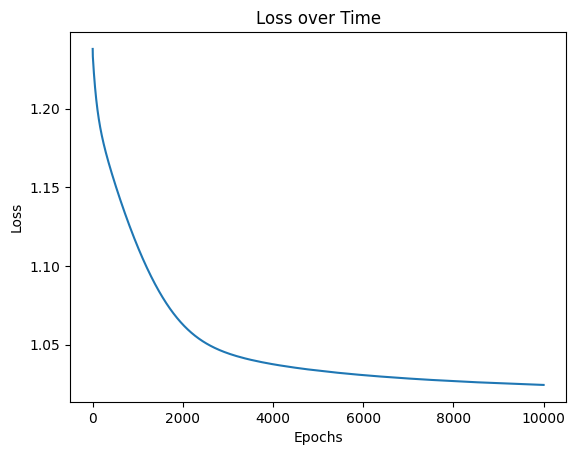

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(3)
# Assuming X_example and Y_example are your input and target tensors
# Initialize the weights and biases
w1 = torch.randn(12, 3, requires_grad=True)
b1 = torch.randn(3, requires_grad=True)

w2 = torch.randn(3,4, requires_grad=True)
b2 = torch.randn(4, requires_grad=True)

w3 = torch.randn(4, 4, requires_grad=True)
b3 = torch.randn(4, requires_grad=True)

# Loss and optimizer
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD([w1, w2, w3, b1, b2, b3], lr=0.003)

# Store losses
losses = []
epochs = 10000

def forward(in_matrix, w1, w2, w3, b1, b2, b3):
    l1_output = torch.tanh(torch.mm(in_matrix, w1) + b1)
    l2_output = torch.tanh(torch.mm(l1_output, w2) + b2)
    l3_output = torch.mm(l2_output, w3) + b3
    return l3_output

# Training loop
for i in range(epochs):
    # Forward pass
    prediction = forward(X_example, w1, w2, w3, b1, b2, b3)


    # Compute loss
    loss_scalar = loss(prediction,Y_example.long())

    # Append the detached loss value to the list
    losses.append(loss_scalar.detach().numpy())

    # Print loss every 10 epochs
    if i % 100 == 0:
        print(f'Epoch - {i}')
        print(f'loss = {loss_scalar.item()}')
        print(f'True Value = {Y_example.long()}')
        print(f'Predicted Value = {torch.argmax(prediction,dim=1)}')

    # Backward pass and optimize
    loss_scalar.backward()
    optimizer.step()
    optimizer.zero_grad()

# Plot the losses
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.show()


In [ ]:
# Batch training
'''
epoch = 1 forward and backward pass of all training samples
batch_size = number of training samples in one forward and backward pass
number of iteraiton = number of passes, each pass using [batch_size] number of samples
e.g 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 peoch
'''

'\nepoch = 1 forward and backward pass of all training samples\nbatch_size = number of training samples in one forward and backward pass\nnumber of iteraiton = number of passes, each pass using [batch_size] number of samples\ne.g 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 peoch\n'

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class HeartDataset(Dataset):
  def __init__(self):
    #data loading
    self.y = torch.from_numpy(Y).unsqueeze(1)
    self.x = torch.from_numpy(X_normalized)
    self.n_samples = self.y.shape[0]

  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]

  def __len__(self):
    # len(dataset)
    return self.n_samples

dataset = HeartDataset()
dataloader = DataLoader(dataset = dataset, batch_size=16, shuffle=True)

# datatiter = iter(dataloader)
# data = next(datatiter)
# features, labels = data
# print(features, labels)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/16)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward backward, update weights
    if (i+1) % 5 == 0:
      print(f'epoch = {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

1025 65
epoch = 1/2, step 5/65, inputs torch.Size([16, 12])
epoch = 1/2, step 10/65, inputs torch.Size([16, 12])
epoch = 1/2, step 15/65, inputs torch.Size([16, 12])
epoch = 1/2, step 20/65, inputs torch.Size([16, 12])
epoch = 1/2, step 25/65, inputs torch.Size([16, 12])
epoch = 1/2, step 30/65, inputs torch.Size([16, 12])
epoch = 1/2, step 35/65, inputs torch.Size([16, 12])
epoch = 1/2, step 40/65, inputs torch.Size([16, 12])
epoch = 1/2, step 45/65, inputs torch.Size([16, 12])
epoch = 1/2, step 50/65, inputs torch.Size([16, 12])
epoch = 1/2, step 55/65, inputs torch.Size([16, 12])
epoch = 1/2, step 60/65, inputs torch.Size([16, 12])
epoch = 1/2, step 65/65, inputs torch.Size([1, 12])
epoch = 2/2, step 5/65, inputs torch.Size([16, 12])
epoch = 2/2, step 10/65, inputs torch.Size([16, 12])
epoch = 2/2, step 15/65, inputs torch.Size([16, 12])
epoch = 2/2, step 20/65, inputs torch.Size([16, 12])
epoch = 2/2, step 25/65, inputs torch.Size([16, 12])
epoch = 2/2, step 30/65, inputs torch.Siz

In [ ]:
# nn.CrossEntropyLoss
# nn.CrossEntropyLoss applies
# nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
# -> no softmax on the last layer
# Y has class labels, not One-Hot!
# Y_pred has raw scores(logits) not softmax
# nn.BCEloss
# add sigmoid to the end layer

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming X and Y are your features and labels
X_train, X_val, y_train, y_val = train_test_split(X.to_numpy(), Y, test_size=0.2, random_state=42)

class HeartDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.x = torch.from_numpy(X_data).float()
        self.y = torch.from_numpy(y_data).long()
        self.n_samples = self.y.shape[0]

    def __getitem__(self, n):
        return self.x[n], self.y[n]

    def __len__(self):
        return self.n_samples

train_dataset = HeartDataset(X_train, y_train)
val_dataset = HeartDataset(X_val, y_val)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

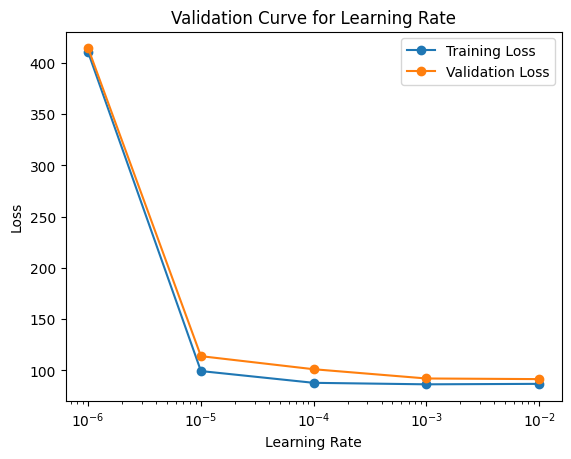

In [ ]:
import matplotlib.pyplot as plt

class NeuralNet(nn.Module):

  def __init__(self, features, l1_size, l2_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(features, l1_size)
    self.tanh = nn.ReLU()
    self.l2 = nn.Linear(l1_size, l2_size)
    self.l3 = nn.Linear(l2_size, num_classes)

  def forward(self, in_matrix):
    l1_out = self.l1(in_matrix)
    l1_out = self.tanh(l1_out)
    l2_out = self.l2(l1_out)
    l2_out = self.tanh(l2_out)
    l3_out = self.l3(l2_out)
    return l3_out

criterion = nn.CrossEntropyLoss()

learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01]  # Different learning rates to try
train_losses = []
val_losses = []

for lr in learning_rates:
    model = NeuralNet(12, 80, 60, 4).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_loss = 0
    val_loss = 0

    for epoch in range(100):

        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Evaluate on validation set
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

    # Average the losses over the number of batches
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))

# Step 3: Plot the Validation Curve
plt.plot(learning_rates, train_losses, label='Training Loss', marker='o')
plt.plot(learning_rates, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.xscale('log')
plt.title('Validation Curve for Learning Rate')
plt.legend()
plt.show()

In [ ]:
#After each epoch on training data, test the weights on new validation data
# plot the loss vs epoch on training data and the loss vs epoch on validation data